See the parent `Method.ipynb` notebook.

#### Notebook config

In [ ]:
import os
import fullwavepy
config = '{path}/config/jupyter.py'.format(path=os.path.dirname(fullwavepy.__file__))

In [ ]:
# %load config
/home/kmc3817/software/fullwavepy/fullwavepy/config/jupyter.py

In [4]:
# %load /home/kmc3817/software/fullwavepy/fullwavepy/config/jupyter.py 
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2

Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


# Geometry

In [5]:
xp = PROTEUS()
# xp.get_geom('kolumbo_thesis')

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


In [9]:
xp.wvl.shape

(1, 1, 2000)

In [15]:
2000*0.0025


5.0

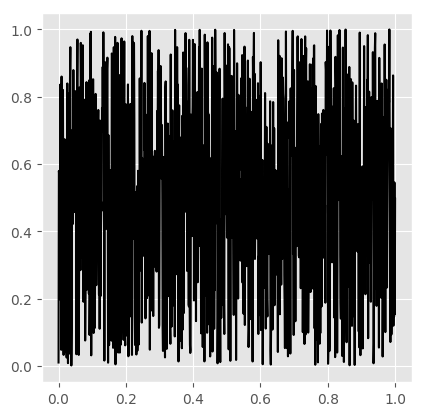

In [14]:
from arrau.a1d import Arr1d
a = Arr1d(np.random.rand(1000), extent=[[0,1]])
a.plot()

# True models

In [10]:
from fwilight.seis import create_chqr

In [2]:
create_chqr

<function fwilight.seis.create_chqr(dims, **kwargs)>

In [ ]:
dims = [341,361,81]

In [ ]:
create_chqr(dims=, sizes=np.ones(3)*10,
                    pads=[[35,30], [35,30], [30,10]]), extent=[[ 8000., 25000.],
       [-3000., 15000.],
       [    0.,  4000.]])

### Synthetic models

#### Alg.
Queueing all the jobs at once on a PBS cluster.

In [ ]:
while read proj; do echo $proj; fwi_qsub_runID_arg.sh $dir/$proj/ $proj $code $q 1; done <sph_names_syn.txt

#### Fig.
Anomaly no. 1. Cubic checquers

sizes [10 10 10] pads [[5, 5], [5, 5], [10, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 9.81 s, sys: 0 ns, total: 9.81 s
Wall time: 9.81 s


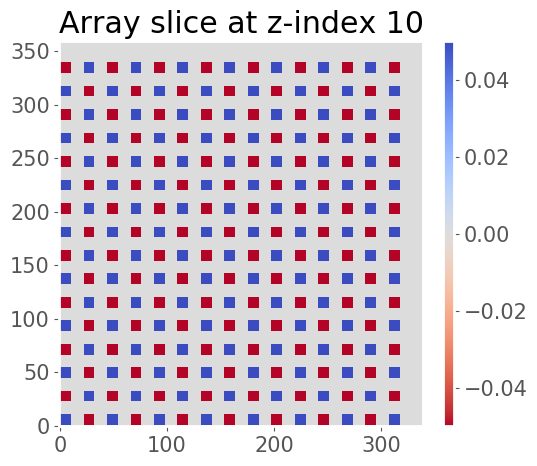

In [15]:
%%time 
from fwilight.seis import create_chqr
dims = box2dims(b01.box, d01['dx'])
sizes = np.array([10,10,10])
pads = [[5,5], [5,5], [10,10]]
ch = A3d(create_chqr(dims=dims, sizes=sizes, pads=pads))

fig = figure(7,5)
ax = ch.plot(10, unit='n', axis='z', aspect='equal', cmap='coolwarm_r')

sizes [10 10 10] pads [[5, 5], [5, 5], [10, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 9.78 s, sys: 8 ms, total: 9.79 s
Wall time: 9.79 s


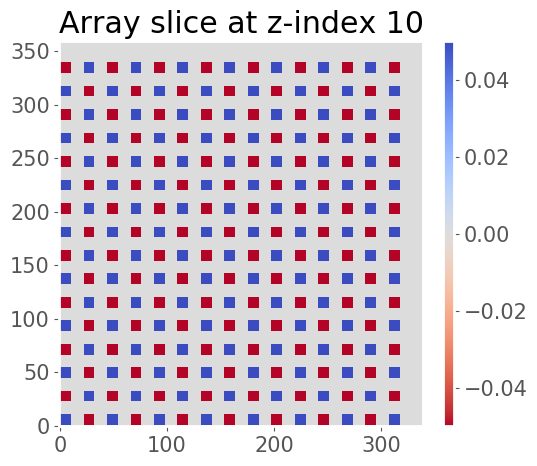

In [21]:
%%time 
from fwilight.seis import create_chqr
dims = box2dims(b01.box, d01['dx'])
sizes = np.array([10,10,10])
pads = [[5,5], [5,5], [10,10]]
ch = A3d(create_chqr(dims=dims, sizes=sizes, pads=pads))

fig = figure(7,5)
ax = ch.plot(10, unit='n', axis='z', aspect='equal', cmap='coolwarm_r')

#### Fig.
Anomaly no. 2. Gaussian checquers.

# A

#### Alg.
Create checquer.

sizes [10 10 10] pads [[35, 30], [35, 30], [30, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 10.3 s, sys: 12 ms, total: 10.3 s
Wall time: 10.3 s


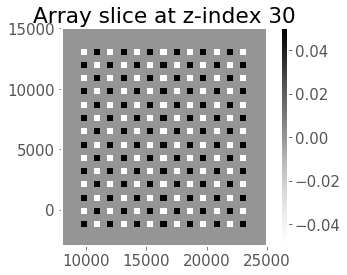

In [16]:
%%time 
from fwilight.seis import create_chqr
a = A3d(create_chqr(dims=[341,361,81], sizes=np.ones(3)*10,
                    pads=[[35,30], [35,30], [30,10]]), extent=[[ 8000., 25000.],
       [-3000., 15000.],
       [    0.,  4000.]])
a.plot(30, unit='n', axis='z', aspect='equal')

#### Alg.
`s01` -- calculating 'field' (synthetic) data through the 'true' (perturbed starting) model.

In [62]:
# code 
f = FlowInvObsChq('s01', path_eph)
lll(40)
# f = FlowInvObsChq('s01', './')
f.run([0], **dict(geom_kol, ns=3000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [54]:
%%time 
f.run([1], data_fname='../../../ch_kol/p14-Observed.sgy', kw_chqr={},
      ztype='d', addtodepth=0, reciprocity=1, cat=0, b_abs=5, e_abs=10)

Step 001: Preparing input for synthetic calculation.
Content of  .//s01syn//inp/s01syn-RawSeis.txt : 
../../../ch_kol/p14-Observed.sgy
 
sizes [20 20 20] pads [[10, 10], [10, 10], [10, 10]] dxs [44.0, 44.0, 44.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to s01syn
 Preparing files for synthetics...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.500000

In [55]:
# redoing as the worfklow failed to add the anomaly 
a = p.syn.i.tvp.anom.read()
b = p.syn.i.tvp.read()
f.syn.i.tvp.create(b + b*a)

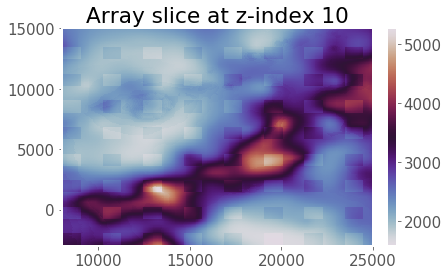

In [56]:
f.syn.i.tvp.plot(slice_at='z', node=10, overwrite=1, overwrite_mmp=1)

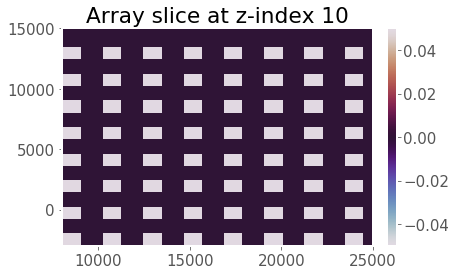

In [30]:
f.syn.i.tvp.anom.plot(slice_at='z', node=10)

In [57]:
lll(20)
f.syn.i.pbs.no[1].prep(select=9, mpiprocs=2)

INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No. of shots in the runfile (ncomp): 16
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: Max. decimal place 0.9411764705882353 is for mpiprocs: 2 and ompthreads: 20


Content of  .//s01syn//inp/s01syn-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N s01syn
#PBS -o ../out/s01syn-JobOut1.log
#PBS -e ../out/s01syn-JobErr1.log
#PBS -l walltime=01:00:00
#PBS -l select=9:mpiprocs=2:ompthreads=20:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/s01syn-Runfile.key   
    rm $work_dir/s01syn-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT WORK IF RUNNI

In [58]:
f.syn.i.rsync('my_eph')

INFO:fullwavepy.project.generic.io.ProjThroughput.rsync: sending incremental file list
./
fullwave3d-verbose-scheduler
              0   0%    0.00kB/s    0:00:00 (xfr#1, to-chk=32/34)
fullwave3d-verbose-slave-1
              0   0%    0.00kB/s    0:00:00 (xfr#2, to-chk=31/34)
s01syn-AnomVp.sgy
     69,432,564   8%   75.47MB/s    0:00:00 (xfr#3, to-chk=29/34)
s01syn-AnomVp.vtr
    110,302,136  13%   58.00MB/s    0:00:01 (xfr#4, to-chk=28/34)
s01syn-BckgVp.sgy
    179,734,700  22%   36.03MB/s    0:00:04 (xfr#5, to-chk=27/34)
s01syn-BckgVp.vtr
    220,604,272  27%   29.01MB/s    0:00:07 (xfr#6, to-chk=26/34)
s01syn-Observed-0000.log
    220,995,123  27%   29.02MB/s    0:00:07 (xfr#7, to-chk=25/34)
s01syn-OutSeis.sgy
    412,334,403  51%   38.53MB/s    0:00:10 (xfr#8, to-chk=24/34)
s01syn-OutSign.sgy
    412,350,243  51%   38.54MB/s    0:00:10 (xfr#9, to-chk=23/34)
s01syn-RawSeis.txt
    412,350,276  51%   38.54MB/s    0:00:10 (xfr#10, to-chk=22/34)
s01syn-RawSign.sgy
    412,362,116  51%

In [59]:
f.syn.i.ose.surange()

Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00571555 s, 560 kB/s

segyread: discrepant tr.ns = 2000 with tape/user ns = 3...
15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    5 19287 (5 - 19287)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0

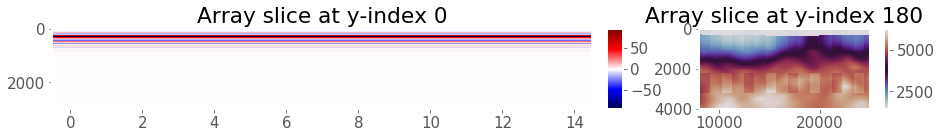

In [63]:
f.syn.i.plot()

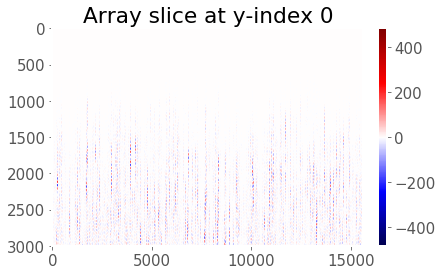

In [65]:
f.syn.o.plot()

In [126]:
f.syn.o.o.no[1].cat()

Content of  .//s01syn//out/s01syn-Out1.log : 
# mpiexec: No RDMA network found -- using sockets+shared memory (I_MPI_DEVICE=ssm)
# mpiexec: full path to program is /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
# mpiexec: program arguments are: s01syn -1 20
# mpiexec: 18 ranks allocated via PBS select
# mpiexec: 20 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has shared use of the allocated nodes. Disabling process-pinning
# mpiexec: machinefile configured as:
cx1-109-10-2.cx1.hpc.ic.ac.uk:2
cx1-109-10-3.cx1.hpc.ic.ac.uk:2
cx1-109-10-4.cx1.hpc.ic.ac.uk:2
cx1-109-12-1.cx1.hpc.ic.ac.uk:2
cx1-109-16-2.cx1.hpc.ic.ac.uk:2
cx1-109-16-3.cx1.hpc.ic.ac.uk:2
cx1-109-2-1.cx1.hpc.ic.ac.uk:2
cx1-109-4-1.cx1.hpc.ic.ac.uk:2
cx1-109-4-2.cx1.hpc.ic.ac.uk:2
#
# mpiexec: Checking all nodes are ONLINE:
# mpiexec: All nodes appear ONLINE
# mpiexec: launch started at Sun  4 Jul 12:53:16 BST 2021
# mpiexec: launching program...
# /rds/general/user/kmc3817/home/PhD/ful

#### Alg.
`s01` -- inverting the synthetic data **without** time-windowing. 

In [41]:
# code 
s01 = FlowInvObsChq('s01', path_eph)
lll(40)
# s01 = FlowInvObsChq('s01', './')
f = s01
f.run([0], **dict(geom_kol, ns=2000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [74]:
f.syn.o.syn.fname

'/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01syn//out/s01syn-Synthetic.sgy'

In [100]:
!cp '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01syn//out/s01syn-Synthetic.sgy' {f.inv.i.path}

In [117]:
lll(40)
# self.i.obs.raw.dupl('s01syn-Synthetic.sgy')

In [125]:
# prep 
self = f.inv   
syn_proj = f.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
obs_file = './s01inv/inp/' + syn_proj.o.syn.name
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file) # NOTE
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem, ns=2000), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

Content of  .//s01inv//inp/s01inv-RawSeis.txt : 
s01inv-Observed_raw.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to s01inv
 Preparing files for inversion...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          5000.00000    
 Output data length (samples):          2000
 Time steps to model:                   2000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       n

In [53]:
# f.inv.i.pbs.no[1].prep(select=9, mpiprocs=2)
# f.inv.i.pbs.no[2].prep(hours=10, select=9, mpiprocs=2)
f.inv.i.pbs.no[3].prep(hours=20, select=9, mpiprocs=2)

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01inv//inp/s01inv-Run3.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N s01inv
#PBS -o ../out/s01inv-JobOut3.log
#PBS -e ../out/s01inv-JobErr3.log
#PBS -l walltime=20:00:00
#PBS -l select=9:mpiprocs=2:ompthreads=20:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/s01inv-Runfile.key   
    rm $work_dir/s01inv-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset N

In [130]:
f.inv.i.rsync('my_eph')

In [7]:
f.inv.o.ls()

Content of /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc/s01inv/out

total 58G
-rwx------ 1 kmc3817 root 853K Jul  4 23:48 s01inv-Out2.log
-rwx------ 1 kmc3817 root  21M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04110-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04138-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04157-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  21M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04137-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  25M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04158-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  24M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04177-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  25M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04123-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jul  4 23:45 s01inv-SLAVES_DUMPCOMPARE-csref04125-iter00073fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jul  4 23:45 s01inv-SLAVES_DUMPC

In [112]:
f.inv.o.o.no[1].cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01inv//out/s01inv-Out1.log : 
# mpiexec: No RDMA network found -- using sockets+shared memory (I_MPI_DEVICE=ssm)
# mpiexec: full path to program is /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
# mpiexec: program arguments are: s01inv -1 20
# mpiexec: 18 ranks allocated via PBS select
# mpiexec: 20 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has shared use of the allocated nodes. Disabling process-pinning
# mpiexec: machinefile configured as:
cx1-109-18-1.cx1.hpc.ic.ac.uk:2
cx1-109-19-4.cx1.hpc.ic.ac.uk:2
cx1-109-6-2.cx1.hpc.ic.ac.uk:2
cx1-109-6-3.cx1.hpc.ic.ac.uk:2
cx1-109-6-4.cx1.hpc.ic.ac.uk:2
cx1-109-7-2.cx1.hpc.ic.ac.uk:2
cx1-109-7-4.cx1.hpc.ic.ac.uk:2
cx1-109-8-2.cx1.hpc.ic.ac.uk:2
cx1-109-9-3.cx1.hpc.ic.ac.uk:2
#
# mpiexec: Checking all nodes are ONLINE:
# mpiexec: All nodes appear ONLINE
# mpiexec: launch started at Sun  4 Jul 14:33:30 BST 2021
# mpiexec: launching progr

(0, 40)

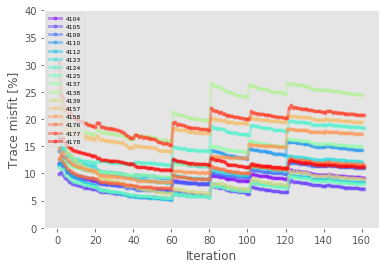

In [7]:
f.inv.o.fit.plot(run_ids=[1,2,3])
plt.ylim(0,40)

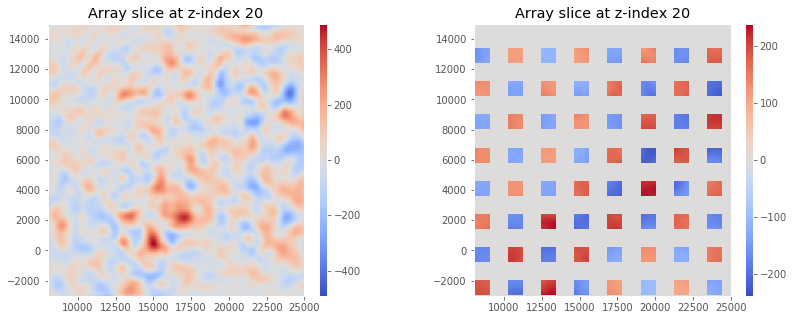

In [17]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[59].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

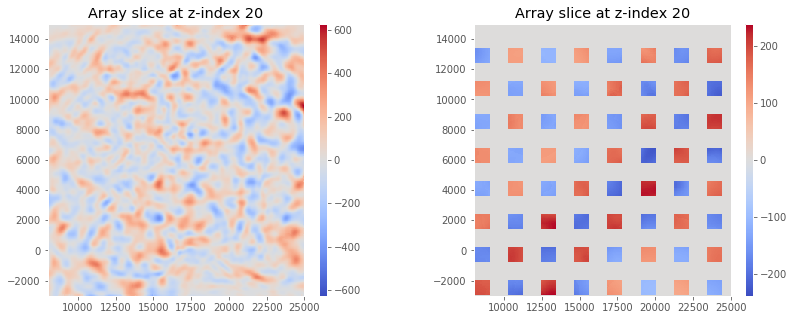

In [9]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[160].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

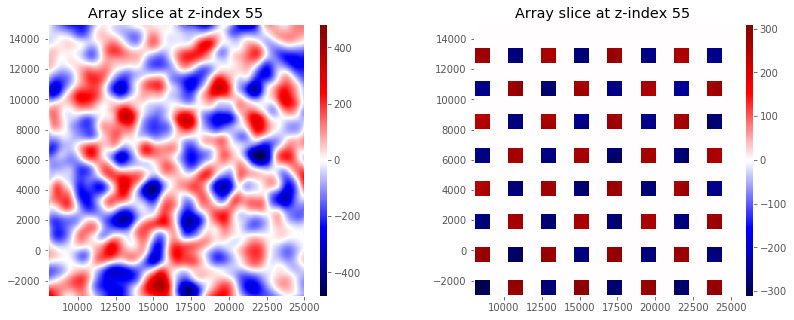

In [10]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[59].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(55, axis='z', cmap='seismic', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(55, axis='z', cmap='seismic', center_cmap=1, aspect='equal')

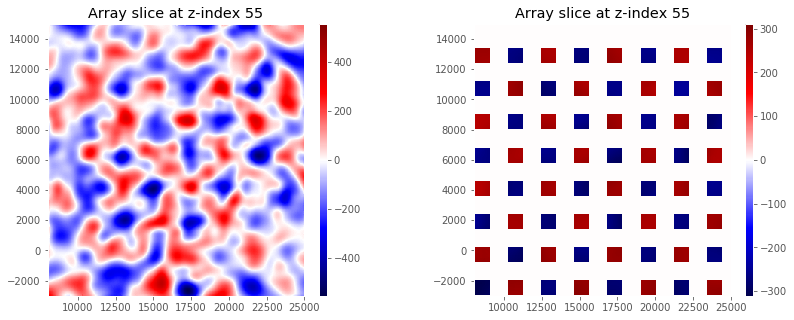

In [11]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[80].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(55, axis='z', cmap='seismic', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(55, axis='z', cmap='seismic', center_cmap=1, aspect='equal')

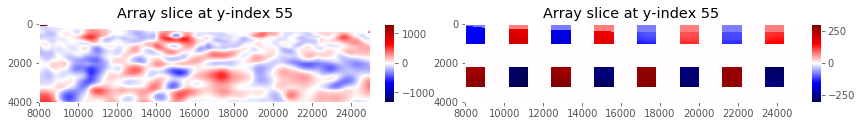

In [14]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[160].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(55, axis='y', cmap='seismic', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(55, axis='y', cmap='seismic', center_cmap=1, aspect='equal')

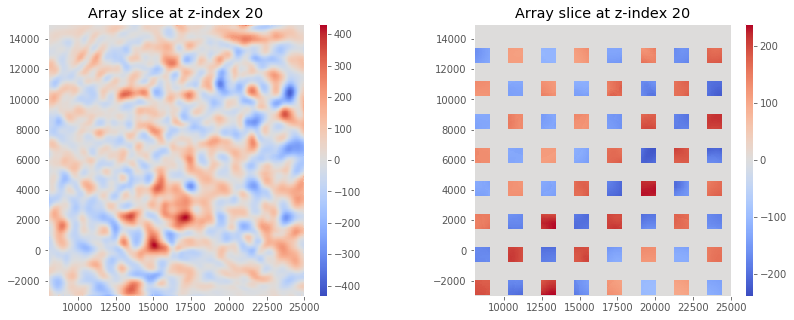

In [15]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[72].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(20, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

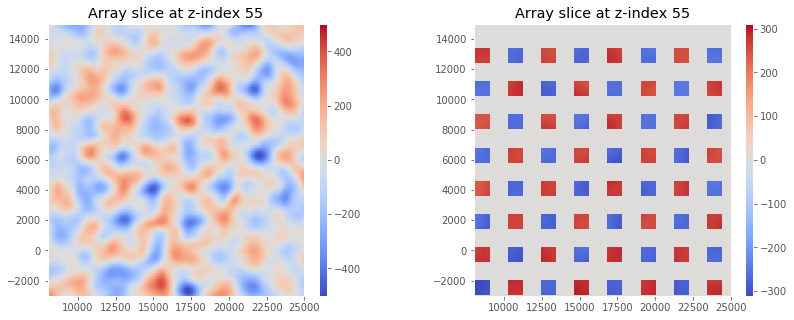

In [13]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[72].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(55, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(55, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

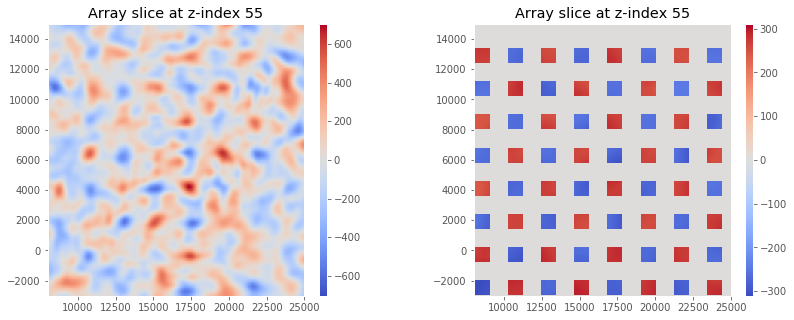

In [8]:
# plot 
f = s01

figure(14,5)
plt.subplot(121)
a = A3d(f.inv.o.vp.it[160].read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].read().extent)
a.plot(55, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

plt.subplot(122)
b = A3d(f.syn.i.tvp.read() - f.inv.o.vp.it[0].read(), extent=f.inv.o.vp.it[2].extent)
b.plot(55, axis='z', cmap='coolwarm', center_cmap=1, aspect='equal')

#### Alg.
`i02` -- inverting the synthetic data with time-windowing (but not filtering). Mute **NOT WORKING**.

In [56]:
%%time 
self = i02.inv
syn_proj = s01.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
obs_file = './s01inv/inp/' + syn_proj.o.syn.name
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file) # NOTE
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem, ns=2000), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

Content of  .//i02inv//inp/i02inv-RawSeis.txt : 
i02inv-Observed_raw.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to i02inv
 Preparing files for inversion...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       n

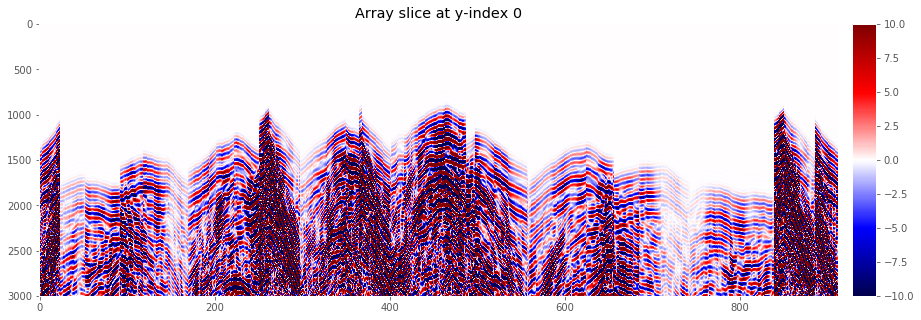

In [59]:
figure(15,5)
self.i.obs.plot(win=dict(tracf=['4104']), clip=10)

In [66]:
fb = self.i.obs.get_fbreaks(syn_proj.o.syn)

INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.get_fbreaks: Getting first breaks from /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01syn//out/s01syn-Synthetic.sgy...
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.dsp.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.


(0, 1000)

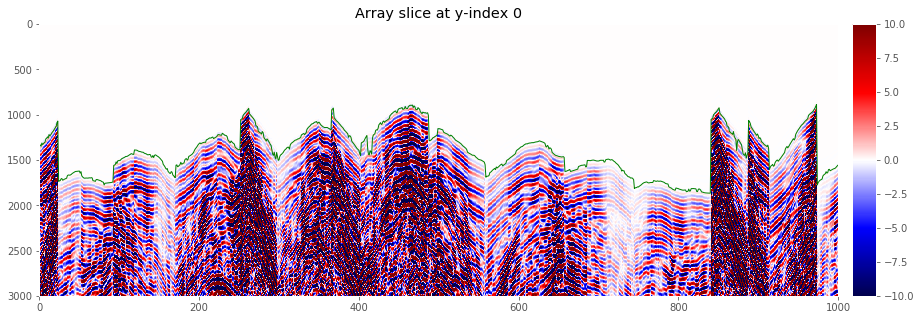

In [81]:
figure(15,5)
syn_proj.o.syn.plot(clip=10, overwrite=0, overwrite_mmp=0)
plt.plot(fb, color='g')
plt.xlim(0,1000)

In [88]:
self.i.obs.dupl(syn_proj.o.syn.fname)

In [83]:
self.i.obs.mute

<bound method ObsDataFile.mute of <fullwavepy.project.files.datalike.sgy.ObsDataFileSgy object at 0x7fe5e88d94a8>>

'.//i02inv//inp//i02inv-Observed.sgy'

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


(0, 1000)

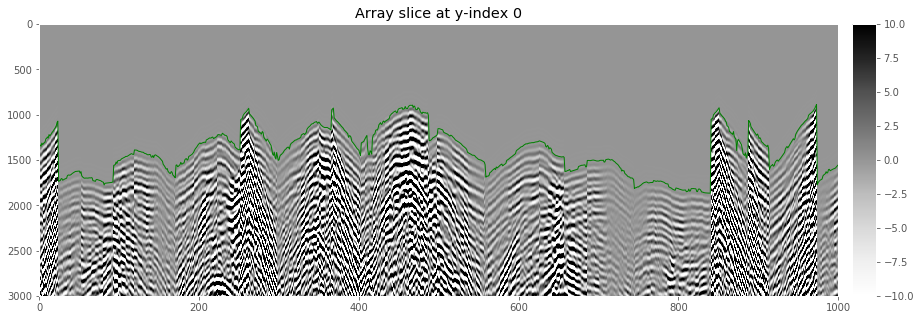

In [89]:
figure(15,5)
s.plot(clip=10, overwrite=0, overwrite_mmp=0)
plt.plot(fb, color='g')
plt.xlim(0,1000)

In [100]:
syn_proj.dt

0.0025

In [101]:
s.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00668684 s, 479 kB/s

15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    1 15632 (1 - 15632)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1798 5150 (3325 - 4938)
mute     4798 8150 (6325 - 7938)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0 1000 (120 - 782)
ntr      19296

Shot coordinate limits:
	North(23852,13847) South(10038,-212

INFO:fullwavepy.ioapi.generic.read_any: Set overwrite_mmp=False for faster i/o!
INFO:fullwavepy.ioapi.generic.read_any: Saving .//i02inv//inp//i02inv-Observed.mmp...


(0, 1000)

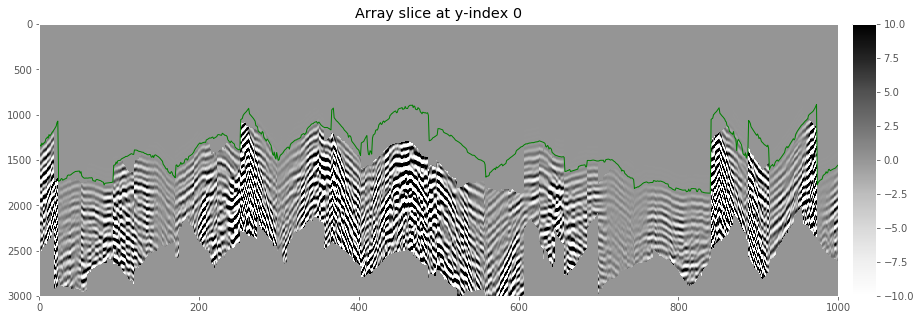

In [102]:
lll(40)
self.i.obs.dupl(syn_proj.o.syn.fname)
s = SgyFile(self.i.obs.name, self.i.obs.path)
s.fname
s.proj = syn_proj
lll(20)
s.mute(fb, ntaper=0, twin=3)
figure(15,5)
s.plot(clip=10, overwrite=1, overwrite_mmp=1)
plt.plot(fb, color='g')
plt.xlim(0,1000)

INFO:fullwavepy.ioapi.generic.read_any: Set overwrite_mmp=False for faster i/o!
INFO:fullwavepy.ioapi.generic.read_any: Saving .//i02inv//inp//i02inv-Observed.mmp...


(6000, 8000)

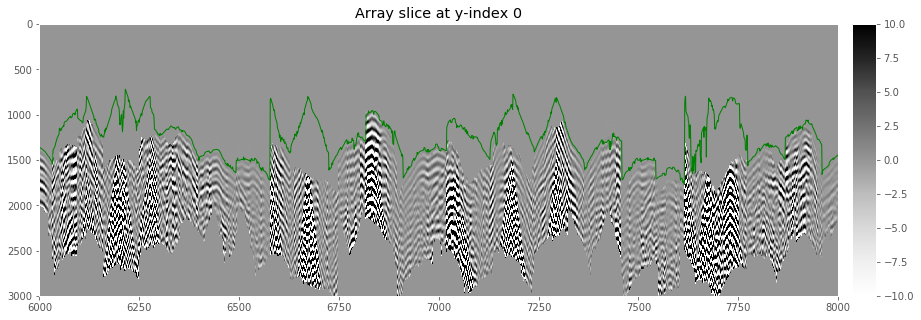

In [104]:
figure(15,5)
s.plot(clip=10, overwrite=1, overwrite_mmp=1)
plt.plot(fb, color='g')
plt.xlim(6000,8000)

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


(0, 1000)

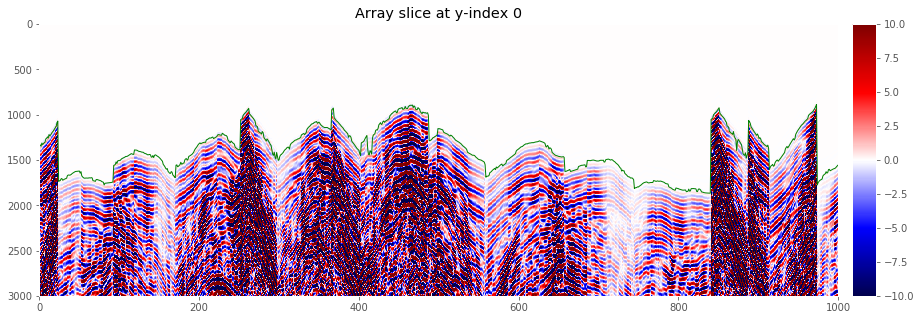

In [79]:
figure(15,5)
self.i.obs.mute()
self.i.obs.plot(clip=10, overwrite=0, overwrite_mmp=0)
plt.plot(fb, color='g')
plt.xlim(0,1000)

INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


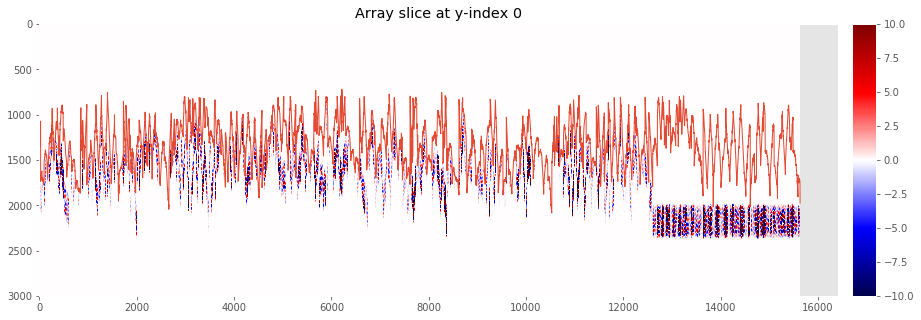

In [71]:
figure(15,5)

plt.plot(fb)

In [60]:
lll(20)
%time self.i.obs.mute(syn_proj.o.syn, fracion=1e-4)

INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.get_fbreaks: Getting first breaks from /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//s01syn//out/s01syn-Synthetic.sgy...
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.dsp.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.mute: Muting .//i02inv//inp/i02inv-Observed.sgy...
CPU times: user 1min 18s, sys: 480 ms, total: 1min 18s
Wall time: 1min 28s


INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.


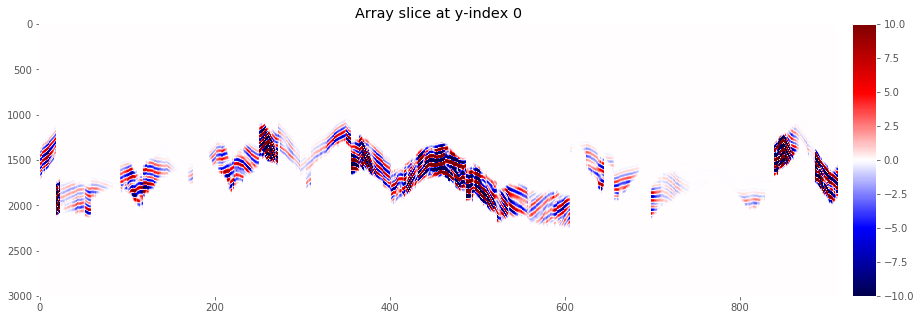

In [62]:
figure(15,5)
self.i.obs.plot(win=dict(tracf=['4104']), clip=10)

#### Alg.
`i02` -- same as above but with time-windowing (with a local copy of `mute` function). NOT working.

In [63]:
# code 
# i02 = FlowInvObsChq('i02', path_eph)
lll(40)
i02 = FlowInvObsChq('i02', './')
f = i02
f.run([0], **dict(geom_kol, ns=3000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [64]:
%%time 
self = i02.inv
syn_proj = s01.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
# obs_file = syn_proj.i.ose.fname
obs_file = './s01inv/inp/' + syn_proj.o.syn.name
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file) # NOTE
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

Content of  .//i02inv//inp/i02inv-RawSeis.txt : 
i02inv-Observed_raw.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to i02inv
 Preparing files for inversion...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       n

In [68]:
def mute(self, fbreaks, ntaper=100, twin=1, **kwargs):
    """
    """
    from fullwavepy.dsp.su import su_mute
    from fullwavepy.ioapi.generic import save_txt
    from fullwavepy.generic.system import bash
    from fullwavepy.generic.parse import kw, strip, exten, \
     path_leave, path_extract
    fbreaks = np.array(fbreaks)
    picks = fbreaks * self.proj.dt
    bpicks = picks + twin
    nmute = len(picks)
    xmute = range(1, nmute + 1)
    tmute = picks
    tmute2 = bpicks
    
    # THIS LOOP ENSURES WE MUTE THE WHOLE TRACE 
    # IF THE FIRST ARRIVAL IS LATER THEN TOTALTIME (AS INDICATE BY pick==0)
    # WITHOUT THIS, IT WAS BUGGY!
    for i, pick in enumerate(picks):
      if pick == 0:
        bpicks[i] = 0    
    
    xmute = [str(i) for i in xmute]
    tmute = [str(i) for i in tmute]
    tmute2 = [str(i) for i in tmute2]
    
    for data, prefix in zip([xmute, tmute, tmute2], ['xmute', 'tmute', 'tmute2']):
      file_txt = prefix + '.txt'
      file_bin = prefix + '.bin'
      save_txt(file_txt, data)
      o, e = bash('a2b < {} n1=1 > {}'.format(file_txt, file_bin))
    
    fname_out = strip(self.fname) + '_tmp' + exten(self.fname)
    
    cmd =  'segyread tape={} | '.format(self.fname)
    cmd += 'sumute key=tracr nmute={nmute} mode=0 ntaper={ntaper} xfile={xmute_bin} tfile={tmute_bin} | sumute key=tracr nmute={nmute} mode=1 ntaper={ntaper} xfile={xmute_bin} tfile={tmute2_bin}'.format(nmute=nmute, ntaper=ntaper, xmute_bin='xmute.bin', tmute_bin='tmute.bin', tmute2_bin='tmute2.bin')
    cmd += ' | segyhdrs | segywrite tape={}'.format(fname_out)
    
    o, e = bash(cmd)
    o, e = bash('mv ' + fname_out + ' ' + self.fname)

In [65]:
%time fb = self.i.obs.get_fbreaks(syn_proj.o.syn)

CPU times: user 1min 17s, sys: 184 ms, total: 1min 17s
Wall time: 1min 23s


In [69]:
%%time 
# kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
kw_mute = {'twin': 1, 'syn_file': syn_proj.o.syn}
mute(self.i.obs, fb)

CPU times: user 44 ms, sys: 20 ms, total: 64 ms
Wall time: 1.96 s


(0, 400)

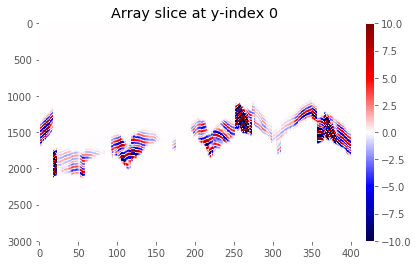

In [72]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

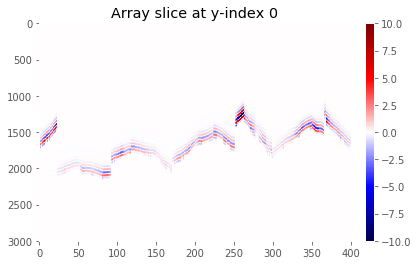

In [40]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

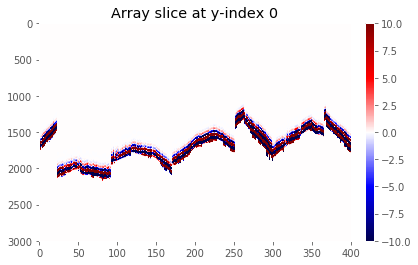

In [32]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

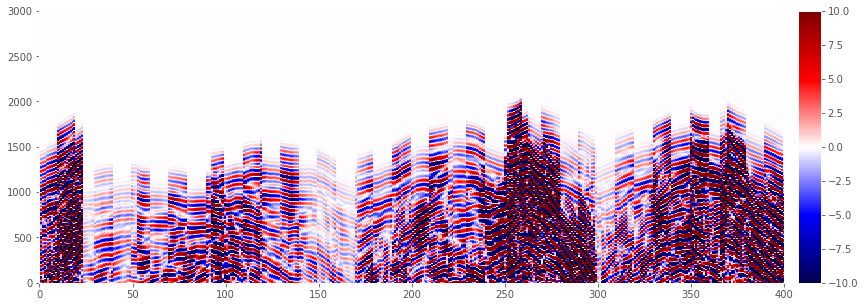

In [51]:
figure(14,5)
self.i.obs.filtered.compare(syn_proj.o.syn, clip=10)
plt.xlim(0,400)

(0, 400)

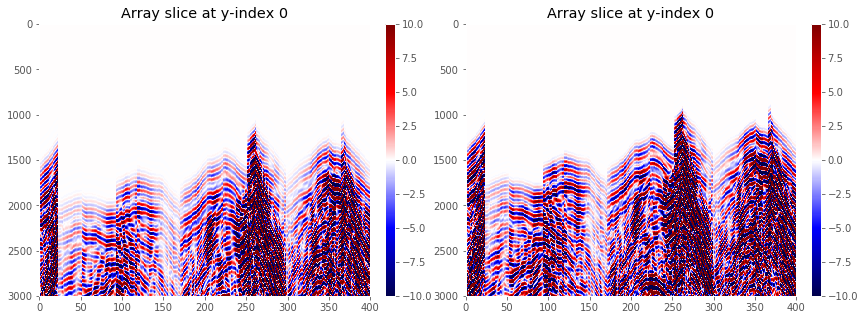

In [47]:
figure(14,5)
plt.subplot(121)
self.i.obs.filtered.plot(clip=10)
plt.xlim(0,400)
plt.subplot(122)
syn_proj.o.syn.plot(clip=10)
plt.xlim(0,400)

In [45]:
self.i.obs.filtered.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440047 s, 727 kB/s

15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    1 15632 (1 - 15632)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0 1000 (120 - 782)
ntr      15632

Shot coordinate limits:
	North(23852,13847) South(10038,-212

#### Alg.
`i02` -- inverting the observed data after **filtering** & time-windowing **WORKING** as expected.

In [21]:
# code 
# i02 = FlowInvObsChq('i02', path_eph)
lll(40)
i02 = FlowInvObsChq('i02', './')
f = i02
f.run([0], **dict(geom_kol, ns=3000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [22]:
%%time 
self = i02.inv
syn_proj = s01.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
obs_file = syn_proj.i.ose.fname # NOTE!!!!!!!!!!!!
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file)
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

Content of  .//i02inv//inp/i02inv-RawSeis.txt : 
i02inv-Observed_raw.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to i02inv
 Preparing files for inversion...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       n

In [28]:
%%time 
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
kw_mute = {'twin': 1, 'syn_file': syn_proj.o.syn}
self.i.obs.process(kw_filt, kw_mute)

CPU times: user 1min 17s, sys: 272 ms, total: 1min 17s
Wall time: 1min 43s


In [36]:
syn_proj.o.syn.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00879551 s, 364 kB/s

15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    5 19287 (5 - 19287)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0 1000 (120 - 782)
ntr      19296

Shot coordinate limits:
	North(23852,13847) South(10038,-212

In [35]:
syn_proj.i.ose.surange()

Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620222 s, 516 kB/s

segyread: discrepant tr.ns = 2000 with tape/user ns = 3...
15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    5 19287 (5 - 19287)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0

(0, 400)

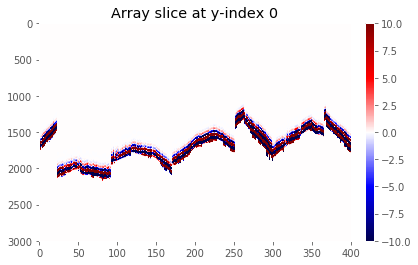

In [32]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

#### Alg.
`i02` -- same as above but using synthetic data. **WORKING**, so the filtering is a must...

In [34]:
# code 
# i02 = FlowInvObsChq('i02', path_eph)
lll(40)
i02 = FlowInvObsChq('i02', './')
f = i02
f.run([0], **dict(geom_kol, ns=3000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [37]:
i02.inv.i.ls()

Content of /media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/PhD-Santorini-FWI/notebooks/ch_unc/i02inv/inp

total 1.9G
-rwxrwxrwx 1 root root 180M Jul  5 01:16 i02inv-Observed.vtr
-rwxrwxrwx 1 root root 183M Jul  5 01:15 i02inv-Observed.sgy
-rwxrwxrwx 1 root root 3.6K Jul  5 01:12 i02inv-Runfile.key
-rwxrwxrwx 1 root root 2.1K Jul  5 01:12 i02inv-SegyPrep.log
-rwxrwxrwx 1 root root  51K Jul  5 01:12 i02inv-Retained-Receivers.ps
-rwxrwxrwx 1 root root 8.1K Jul  5 01:12 i02inv-Retained-Sources.ps
-rwxrwxrwx 1 root root 2.4K Jul  5 01:12 i02inv-Skeleton.key
-rwxrwxrwx 1 root root  998 Jul  5 01:12 i02inv-SourceSig-Time.log
-rwxrwxrwx 1 root root 1.2K Jul  5 01:12 i02inv-Signature.hed
-rwxrwxrwx 1 root root  408 Jul  5 01:12 i02inv-Signature.idx
-rwxrwxrwx 1 root root 195K Jul  5 01:12 i02inv-Signature.sgy
-rwxrwxrwx 1 root root  16K Jul  5 01:12 i02inv-OutSign.sgy
-rwxrwxrwx 1 root root 901K Jul  5 01:12 i02inv-Observed-Time.log
-rwxrwxrwx 1 root root 978K Jul  5 01:12 i02inv-Observed.hed
-rwx

In [38]:
self = i02.inv

In [40]:
%%time 
self = i02.inv
syn_proj = s01.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
# obs_file = syn_proj.i.ose.fname
obs_file = './s01inv/inp/' + syn_proj.o.syn.name
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file) # NOTE
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

NameError: name 's01' is not defined

In [39]:
%%time 
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
kw_mute = {'twin': 1, 'syn_file': syn_proj.o.syn}
self.i.obs.process(kw_filt, kw_mute)

CPU times: user 1min 16s, sys: 376 ms, total: 1min 17s
Wall time: 1min 44s


In [36]:
syn_proj.o.syn.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00879551 s, 364 kB/s

15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    5 19287 (5 - 19287)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0 1000 (120 - 782)
ntr      19296

Shot coordinate limits:
	North(23852,13847) South(10038,-212

In [35]:
syn_proj.i.ose.surange()

Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00620222 s, 516 kB/s

segyread: discrepant tr.ns = 2000 with tape/user ns = 3...
15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    5 19287 (5 - 19287)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0

(0, 400)

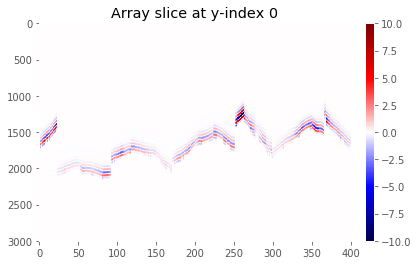

In [40]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

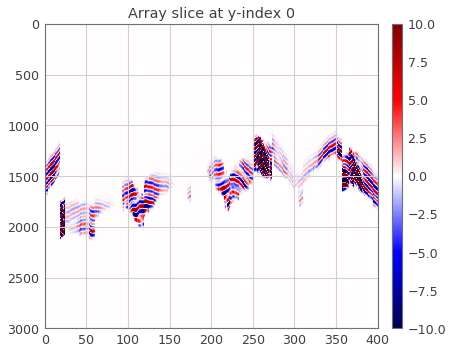

In [39]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

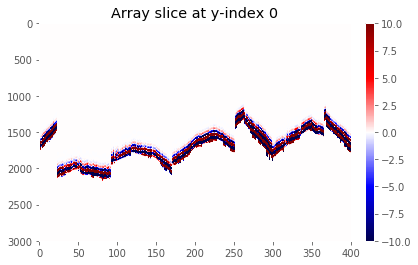

In [32]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

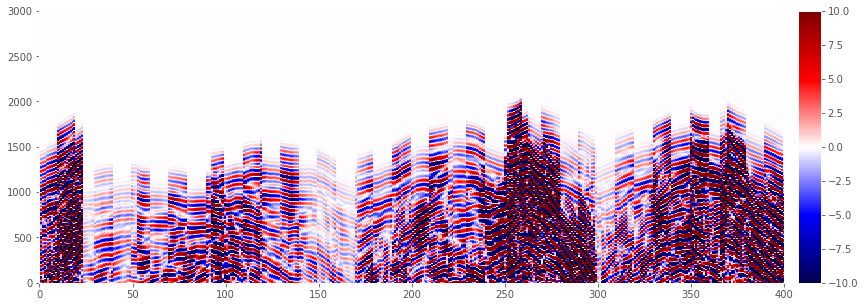

In [51]:
figure(14,5)
self.i.obs.filtered.compare(syn_proj.o.syn, clip=10)
plt.xlim(0,400)

(0, 400)

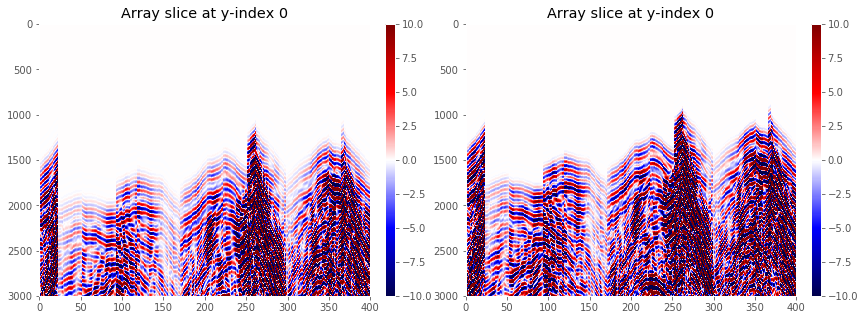

In [47]:
figure(14,5)
plt.subplot(121)
self.i.obs.filtered.plot(clip=10)
plt.xlim(0,400)
plt.subplot(122)
syn_proj.o.syn.plot(clip=10)
plt.xlim(0,400)

In [45]:
self.i.obs.filtered.surange()

3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00440047 s, 727 kB/s

15632 traces:
tracl    3555 13370 (3559 - 13361)
tracr    1 15632 (1 - 15632)
fldr     17567 42821 (17571 - 42812)
tracf    4104 4178 (4104 - 4176)
ep       5 38 (5 - 38)
cdpt     0 1 (0 - 1)
offset   5000 20252 (9814 - 18652)
gelev    -410 456 (417 - -410)
selev    -12
sdepth   12
swdep    45 503 (398 - 398)
gwdep    196 456 (417 - 410)
scalel   1
scalco   1
sx       8051 24996 (8860 - 9610)
sy       -2126 13847 (13743 - 13732)
gx       8863 24030 (18674 - 21101)
gy       -1040 13806 (13806 - -960)
counit   1
tstat    250
delrt    0 5 (0 - 4)
muts     1883 4860 (3383 - 4773)
mute     2883 5860 (4383 - 5773)
ns       3000
dt       2500
gain     0 1 (1 - 0)
igc      0 16 (16 - 0)
year     2015
day      331 340 (331 - 340)
hour     0 23 (3 - 15)
minute   0 59 (10 - 7)
sec      0 59 (54 - 24)
timbas   0 1000 (120 - 782)
ntr      15632

Shot coordinate limits:
	North(23852,13847) South(10038,-212

#### Alg.
`i03` -- same as above but using `skip` in `kw_filt` as in `c08ti` projects in `kmb-2.ipynb`.

In [43]:
# code 
# i03 = FlowInvObsChq('i03', path_eph)
lll(40)
i03 = FlowInvObsChq('i03', './')
f = i03
f.run([0], **dict(geom_kol, ns=3000), exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [44]:
%%time 
self = f.inv
syn_proj = s01.syn
self.i.rsg.dupl(syn_proj.i.rsg.fname)
self.i.svp.dupl(syn_proj.i.tvp.bckg.fname)
# obs_file = syn_proj.i.ose.fname
obs_file = './s01inv/inp/' + syn_proj.o.syn.name
self.i.obs.dupl(obs_file)
self.i.obs.raw.dupl(obs_file) # NOTE
self.i.rse.prep(fnames=[self.i.obs.raw.name])
self.i.sp.prep(**dict(syn_proj.i.sp.read(), problem=self.problem), cat=0)
self.i.sp.run(cat=1)
self.i.rnf.prep(b_abs=5, e_abs=10)

Content of  .//i03inv//inp/i03inv-RawSeis.txt : 
i03inv-Observed_raw.sgy
 

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to i03inv
 Preparing files for inversion...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          7500.00000    
 Output data length (samples):          3000
 Time steps to model:                   3000

 Receiver-array fixed in space:          yes
 Renumber original channel numbers:       n

In [48]:
%%time 
kw_filt = {'pad': 100, 'f1': 2, 'f2': 3, 'f3': 4.5, 'f4': 6.5, 'zerophase': False}
# kw_mute = {'twin': 1, 'syn_file': syn_proj.o.syn}
%time self.i.obs.process(filt_kwargs=dict(kw_filt, skip=True), mute_kwargs={}, syn_file=syn_proj.o.syn)

CPU times: user 1min 19s, sys: 296 ms, total: 1min 20s
Wall time: 1min 32s
CPU times: user 1min 19s, sys: 296 ms, total: 1min 20s
Wall time: 1min 32s


(0, 400)

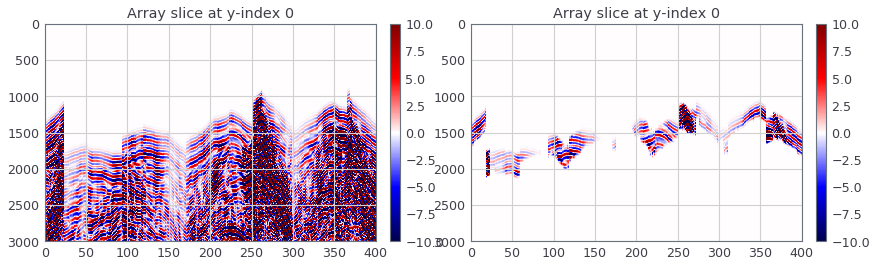

In [51]:
figure(14,4)
plt.subplot(121)
self.i.obs.raw.plot(clip=10)
plt.xlim(0,400)
plt.subplot(122)
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

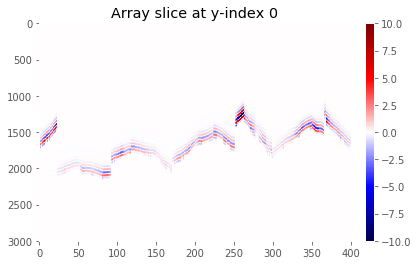

In [40]:
self.i.obs.plot(clip=10)
plt.xlim(0,400)

(0, 400)

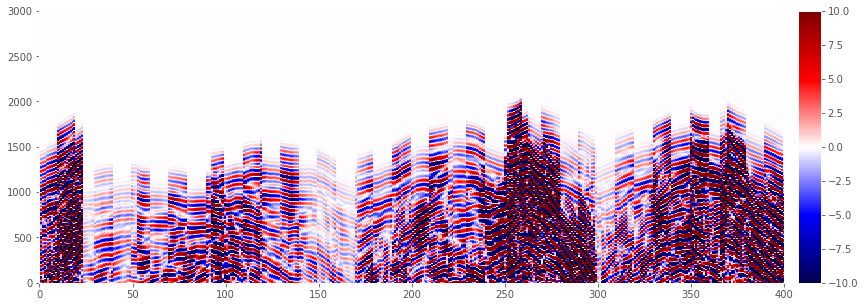

In [51]:
figure(14,5)
self.i.obs.filtered.compare(syn_proj.o.syn, clip=10)
plt.xlim(0,400)

(0, 400)

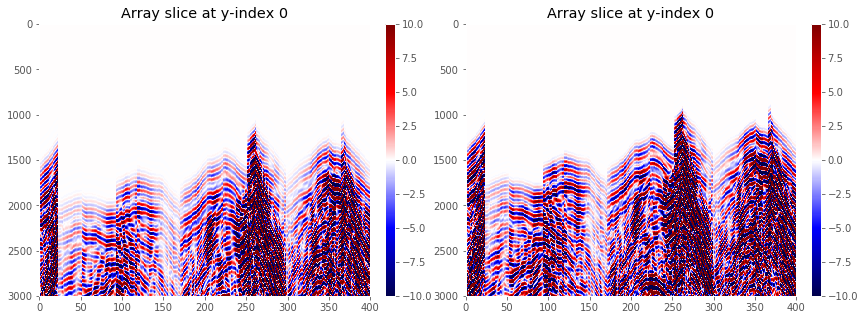

In [47]:
figure(14,5)
plt.subplot(121)
self.i.obs.filtered.plot(clip=10)
plt.xlim(0,400)
plt.subplot(122)
syn_proj.o.syn.plot(clip=10)
plt.xlim(0,400)

# B

#### Alg.
Checkerboard test.

In [30]:
# unc01 = FlowInvObsChq('unc01', path_eph)
unc01 = FlowInvObsChq('unc01', './')
lll(40)
unc01.run([0], box=b01.box, **d01, exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [69]:
unc01.syn.i.rm()

Content of /media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/PhD-Santorini-FWI/notebooks/ch_kol/unc01syn/inp

total 678M
-rwxrwxrwx 1 root root  39M Jun 23 06:44 rm_unc01syn-BckgVp.mmp
-rwxrwxrwx 1 root root  39M Jun 23 06:44 rm_unc01syn-BckgVp.vtr
-rwxrwxrwx 1 root root  39M Jun 23 06:41 rm_unc01syn-AnomVp.mmp
-rwxrwxrwx 1 root root  39M Jun 23 06:41 rm_unc01syn-AnomVp.vtr
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 rm_unc01syn-Run1.pbs
-rwxrwxrwx 1 root root    0 Jun 23 06:32 rm_fullwave3d-verbose-slave-1
-rwxrwxrwx 1 root root    0 Jun 23 06:32 rm_fullwave3d-verbose-scheduler
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 rm_unc01syn-Run0.pbs
-rwxrwxrwx 1 root root 3.0K Jun 23 06:32 rm_unc01syn-Runfile.key
-rwxrwxrwx 1 root root 2.1K Jun 23 06:32 rm_unc01syn-SegyPrep.log
-rwxrwxrwx 1 root root  51K Jun 23 06:32 rm_unc01syn-Retained-Receivers.ps
-rwxrwxrwx 1 root root 8.1K Jun 23 06:32 rm_unc01syn-Retained-Sources.ps
-rwxrwxrwx 1 root root 1.7K Jun 23 06:32 rm_unc01syn-Skeleton.key
-rwxrwxrwx 1 ro

In [75]:
%%time 
lll(10)
unc01.run([1], data_fname='../../../ch_kol/p14-Observed.sgy', kw_chqr=dict(sizes=np.ones(3)*10,
                    pads=[[35,30], [35,30], [30,10]]),
      ztype='d', addtodepth=0, reciprocity=1, cat=0, b_abs=5, e_abs=10)

DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 0
Step 001: Preparing input for synthetic calculation.
DEBUG:fullwavepy.project.files.text.misc.RawSeisTxtFile._select_retained: Selecting the stations contained in the model box.


INFO:fullwavepy.project.files.text.misc.RawSeisTxtFile.create: No. of fnames selected: 1
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && cat .//unc01syn//inp/unc01syn-RawSeis.txt
DEBUG:fullwavepy.generic.system.bash: stdout:../../../ch_kol/p14-Observed.sgy



Content of  .//unc01syn//inp/unc01syn-RawSeis.txt : 
../../../ch_kol/p14-Observed.sgy
 
DEBUG:fullwavepy.ioapi.fw3d.save_vtr: File to save: .//unc01syn//inp/unc01syn-RawSign.vtr
DEBUG:fullwavepy.ioapi.segy.vtr2sgy: cmd: printf "yes
.//unc01syn//inp/unc01syn-RawSign.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && printf "yes
.//unc01syn//inp/unc01syn-RawSign.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):
VTR to SEG-Y file conversion  -  v1.31
****************************

Output traces by in-line then x-line? (default = yes) >> SEG-Y trace order will ...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && segyread tape=.//unc01syn//inp/unc01syn-RawSign.sgy | sushw key=dt a=2500 | segyhdrs | segyclean | segywrite tape=.//unc01syn//inp/unc01syn-RawSign.sgy.tmp
DEBUG:fullwavepy.generic.system.bash: stderr:Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes 

DEBUG:fullwavepy.generic.system.bash: stderr:Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00189306 s, 1.7 MB/s

segyread: discrepant tr.ns = 0 with tape/user ns = 81
	...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && mv .//unc01syn//inp/unc01syn-AnomVp.sgy.tmp .//unc01syn//inp/unc01syn-AnomVp.sgy
DEBUG:fullwavepy.ioapi.fw3d.save_vtr: File to save: .//unc01syn//inp/unc01syn-TrueVp.vtr
DEBUG:fullwavepy.ioapi.segy.vtr2sgy: cmd: printf "yes
.//unc01syn//inp/unc01syn-TrueVp.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && printf "yes
.//unc01syn//inp/unc01syn-TrueVp.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):
VTR to SEG-Y file conversion  -  v1.31
****************************

Output traces by in-line then x-line? (default = yes) >> SEG-Y trace order will ...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd 

DEBUG:fullwavepy.ioapi.generic.read_dict: File to read: .//unc01syn//inp/unc01syn-Runfile.key
DEBUG:fullwavepy.ioapi.generic.read_dict: Will convert all keys into lower case
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//inp/unc01syn-JobInfo0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-Out0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-Err0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-JobOut0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-JobErr0.log does not exist.
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: debug
DEBUG:fullwavepy.ioapi.generic.read_dict: File to read: .//unc01syn//inp/unc01syn-Runfile.key
DEBUG:fullwavepy.ioapi.generic.read_dict: Will convert all keys into lower case
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No

DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-scheduler
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-slave-1


DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && cat .//unc01syn//inp/unc01syn-Run0.pbs
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc...
Content of  .//unc01syn//inp/unc01syn-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc01syn
#PBS -o ../out/unc01syn-JobOut0.log
#PBS -e ../out/unc01syn-JobErr0.log
#PBS -l walltime=00:01:00
#PBS -l select=1:mpiprocs=2:ompthreads=4:ncpus=8:mem=96gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/unc01syn-Runfile.key   


DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-scheduler
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-slave-1


DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 2
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 3
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 4
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 5
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 6
CPU times: user 34.8 s, sys: 12.3 s, total: 47.2 s
Wall time: 2min 13s


In [93]:
unc01.syn.i.pbs.no[1].prep(select=9)

Content of  .//unc01syn//inp/unc01syn-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc01syn
#PBS -o ../out/unc01syn-JobOut1.log
#PBS -e ../out/unc01syn-JobErr1.log
#PBS -l walltime=01:00:00
#PBS -l select=9:mpiprocs=1:ompthreads=40:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/unc01syn-Runfile.key   
    rm $work_dir/unc01syn-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT

In [94]:
unc01.syn.i.rsync('my_eph')

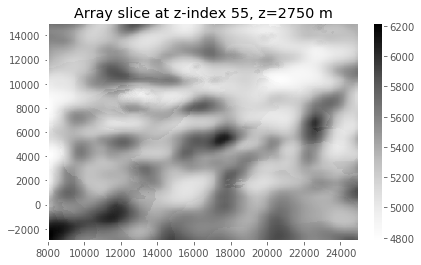

In [77]:
%mi
lll(40)
A3d(unc01.syn.i.tvp.read(overwite_mmp=1, overwrite=1)).plot(2750, unit='m', axis='z')

In [54]:
unc01.syn.i.ls()

Content of /media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/PhD-Santorini-FWI/notebooks/ch_kol/unc01syn/inp

total 602M
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 unc01syn-Run1.pbs
-rwxrwxrwx 1 root root    0 Jun 23 06:32 fullwave3d-verbose-slave-1
-rwxrwxrwx 1 root root    0 Jun 23 06:32 fullwave3d-verbose-scheduler
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 unc01syn-Run0.pbs
-rwxrwxrwx 1 root root 3.0K Jun 23 06:32 unc01syn-Runfile.key
-rwxrwxrwx 1 root root 2.1K Jun 23 06:32 unc01syn-SegyPrep.log
-rwxrwxrwx 1 root root  51K Jun 23 06:32 unc01syn-Retained-Receivers.ps
-rwxrwxrwx 1 root root 8.1K Jun 23 06:32 unc01syn-Retained-Sources.ps
-rwxrwxrwx 1 root root 1.7K Jun 23 06:32 unc01syn-Skeleton.key
-rwxrwxrwx 1 root root  998 Jun 23 06:32 unc01syn-SourceSig-Time.log
-rwxrwxrwx 1 root root 1.2K Jun 23 06:32 unc01syn-Signature.hed
-rwxrwxrwx 1 root root  408 Jun 23 06:32 unc01syn-Signature.idx
-rwxrwxrwx 1 root root 133K Jun 23 06:32 unc01syn-Signature.sgy
-rwxrwxrwx 1 root root  12K Jun 23 06

In [89]:
a = unc01.syn.i.tvp.anom.read()
b = unc01.syn.i.tvp.bckg.read()
c = unc01.syn.i.tvp.read(overwrite=1, overwrite_mmp=1)

In [85]:
unc01.syn.i.tvp.create(b + b*a)

<IPython.core.display.Javascript object>


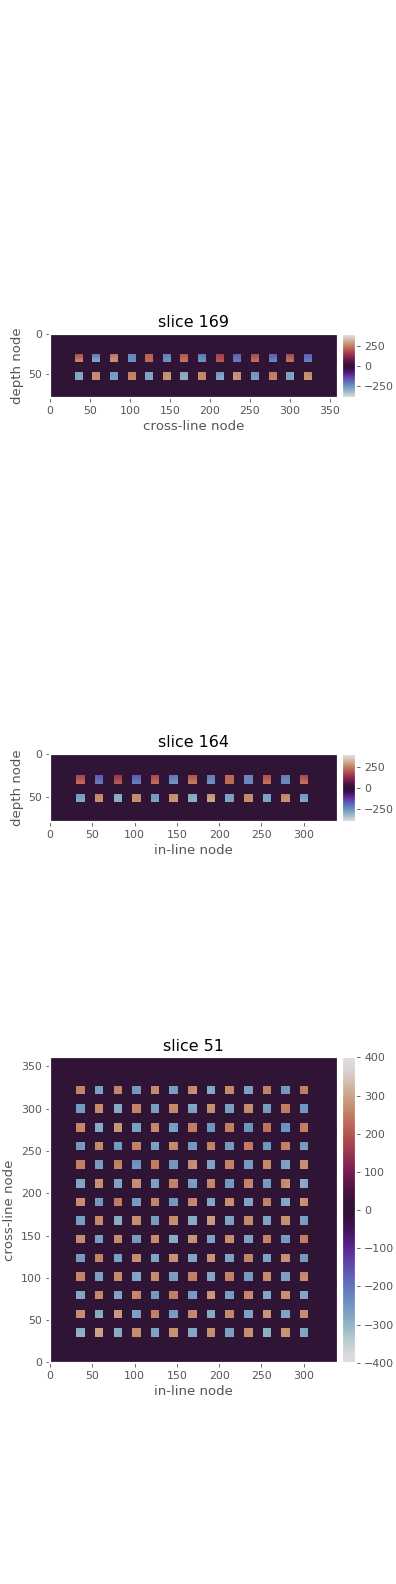

6

In [91]:
%mn
%mn
fig = plt.figure(figsize=(5,20))
tracker = A3d(c-b).scrollall(fig, vmin=-400, vmax=400)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

<IPython.core.display.Javascript object>


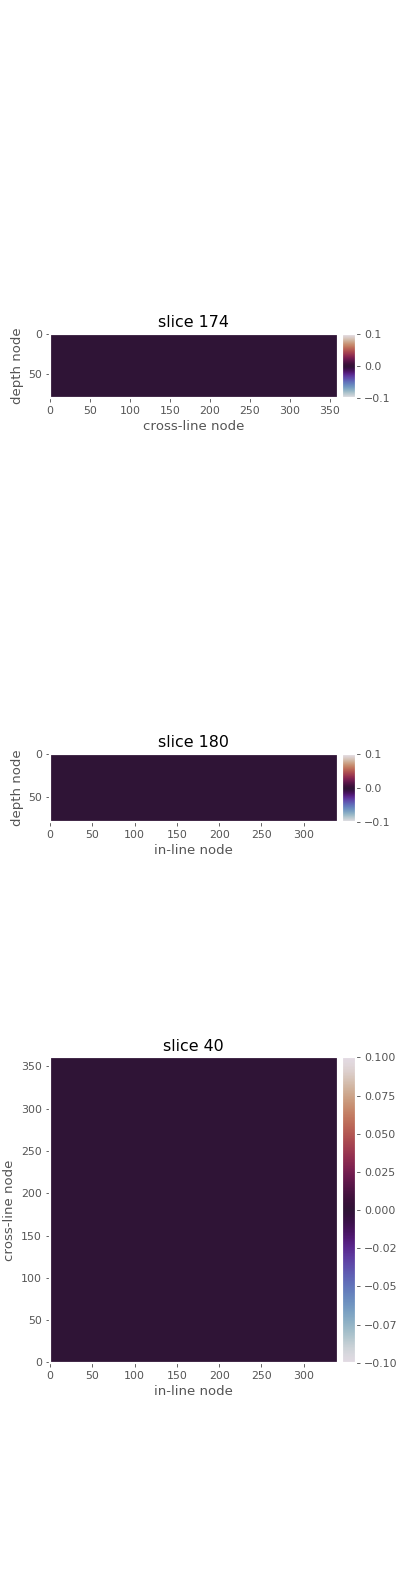

6

In [81]:
%mn
%mn
fig = plt.figure(figsize=(5,20))
tracker = A3d(a).scrollall(fig, vmin=-.1, vmax=.1)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

#### Tab.
Smoothing of `p14` was 2, 2, 1.

In [17]:
p14.i.rnf.cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81 
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef      

# C

## Synthetic anomalies

#### Fig.
Sinusoidal checkerboards.

In [15]:
Anom

fwilight.seis.Anom

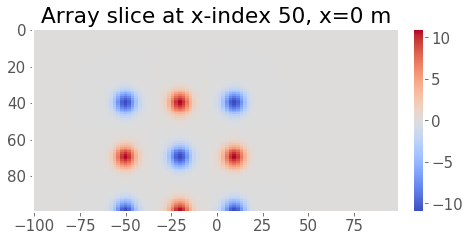

In [14]:
a = Anom()
g = a.create(dims=(101,101,101), box=[-100,100,-100,100,0,100], fwhm=10., Amax=11.,
         x0=-50, nx=3, dx=50,
         y0=-50, ny=3, dy=30,
         z0=40, nz=3, dz=30)
figure(7,4)
ax = A3d(g).plot(0, unit='m', axis='x', cmap='coolwarm', aspect='equal')

In [13]:
a = A3d(np.zeros((box2dims(box, dx))), extent=)
a.shape

(341, 361, 81)

## Implementation

#### Alg.
Vectorised array-list-of-scalars operation.

In [282]:
nx, ny, nn = 10, 5, 2
x, y = np.meshgrid(range(nx), range(ny), indexing='ij')
p = np.array([5,5])
xx = np.zeros([nn] + list(x.shape))
xx[:] = x
yy = np.zeros([nn] + list(y.shape))
yy[:] = y

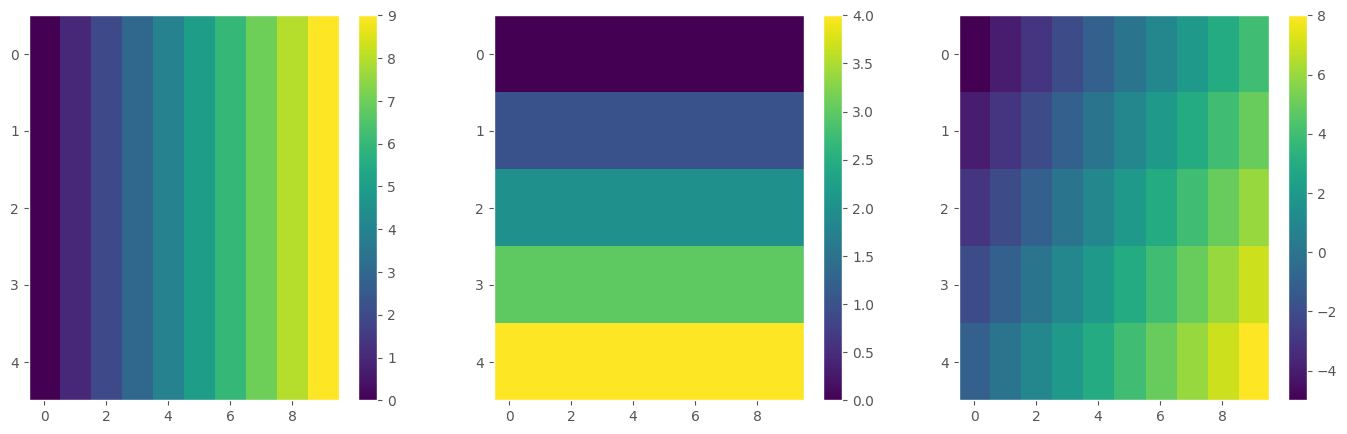

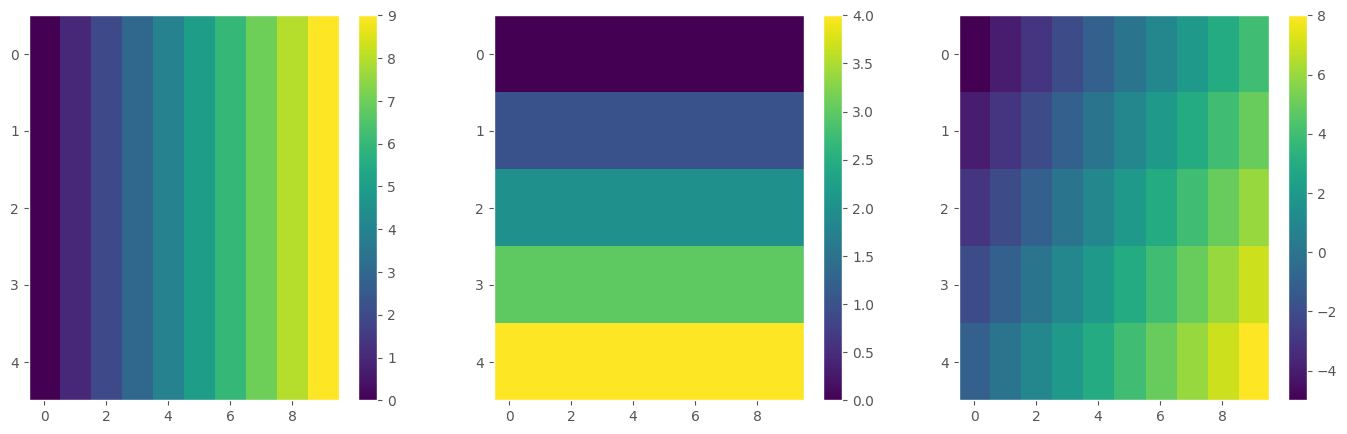

In [290]:
def foo(x, y, p):
    return x + y - p

p = np.array([5,5])
z = foo(xx.T, yy.T, p).T

for i in range(nn):
    figure(17,5)
    plt.subplot(131)
    plt.imshow(xx[i].T)
    plt.colorbar()
    plt.subplot(132)
    plt.imshow(yy[i].T)
    plt.colorbar()
    plt.subplot(133)
    plt.imshow(z[i].T)
    plt.colorbar()

#### Fig.
Anomalous model.

<IPython.core.display.Javascript object>


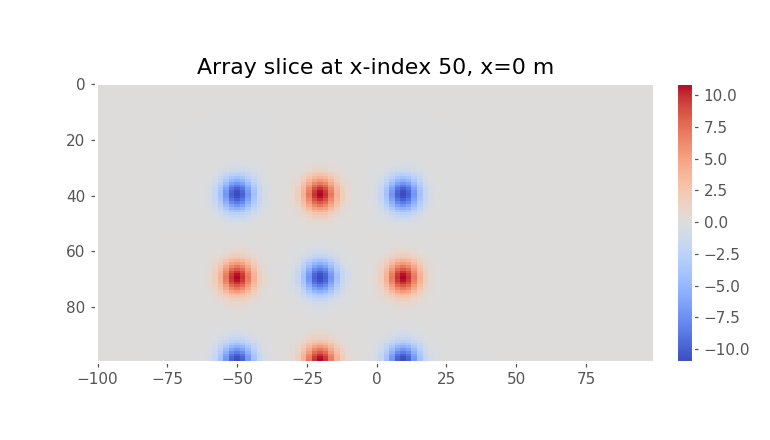

CPU times: user 1.74 s, sys: 16 ms, total: 1.75 s
Wall time: 889 ms


In [9]:
%%time 
a = Anom()
g = a.create(dims=(101,101,101), box=[-100,100,-100,100,0,100], fwhm=10., Amax=11.,
         x0=-50, nx=3, dx=50,
         y0=-50, ny=3, dy=30,
         z0=40, nz=3, dz=30)
figure(7,4)
ax = A3d(g).plot(0, unit='m', axis='x', cmap='coolwarm', aspect='equal')

<IPython.core.display.Javascript object>


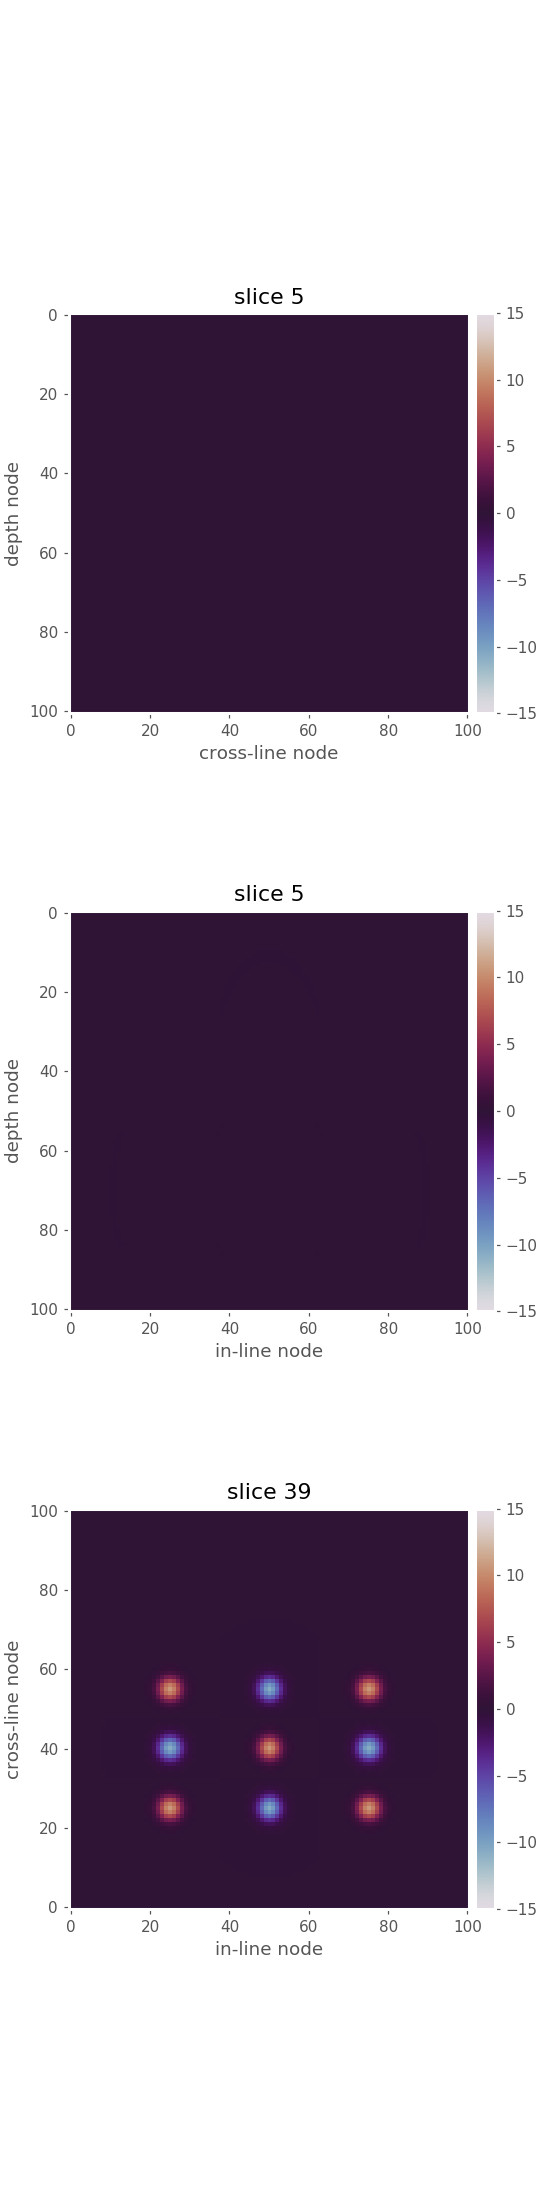

6

In [10]:
%mn
%mn
fig = plt.figure(figsize=(5,20))
tracker = A3d(g).scrollall(fig, vmin=-15, vmax=15)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

#### Alg.
Create checquer.

sizes [10 10 10] pads [[35, 30], [35, 30], [30, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 10.1 s, sys: 16 ms, total: 10.2 s
Wall time: 10.2 s


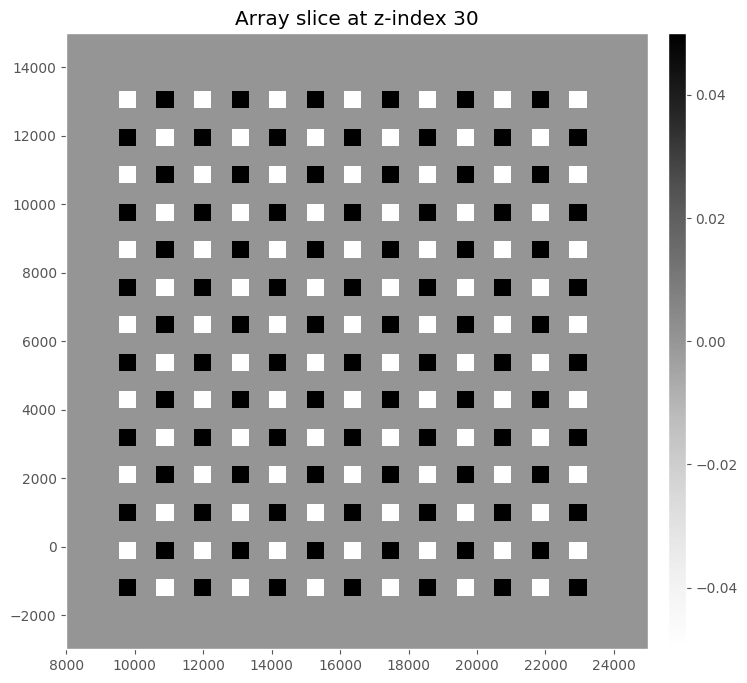

In [35]:
%%time 
from fwilight.seis import create_chqr
a = A3d(create_chqr(dims=[341,361,81], sizes=np.ones(3)*10,
                    pads=[[35,30], [35,30], [30,10]]), extent=[[ 8000., 25000.],
       [-3000., 15000.],
       [    0.,  4000.]])
a.plot(30, unit='n', axis='z', aspect='equal')

CPU times: user 24 ms, sys: 4 ms, total: 28 ms
Wall time: 25.5 ms


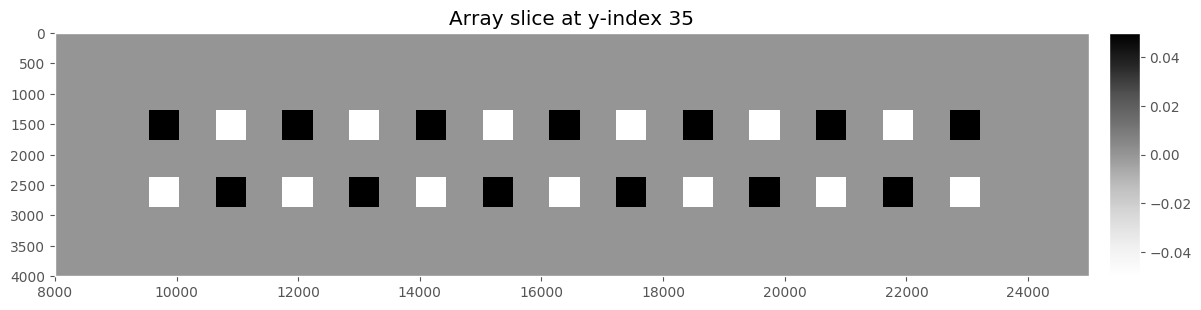

In [37]:
%%time 
a.plot(35, unit='n', axis='y', aspect='equal')

## Results

#### Alg.
`chq01` -- calculating 'field' (synthetic) data through the 'true' (perturbed starting) model.

In [9]:
# code 
chq01 = FlowInvObsChq('chq01', path_eph)
# chq01 = FlowInvObsChq('chq01', '.')
lll(40)
chq01.run([0], **geom_kol, exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


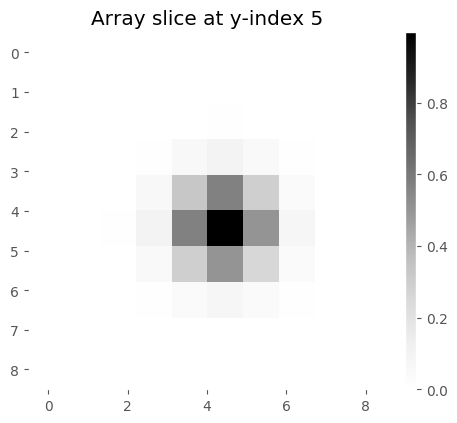

In [44]:
g = gauss3d(*a.grid, 55, 55, 55)
figure(5,5)
g.plot(5, aspect='equal')

In [11]:
%%time 
chq01.run([1], data_fname='../../../ch_kol/p14-Observed.sgy', kw_chqr={},
      ztype='d', addtodepth=0, reciprocity=1, cat=0, b_abs=5, e_abs=10)

Step 001: Preparing input for synthetic calculation.
Content of  ./chq01syn//inp/chq01syn-RawSeis.txt : 
../../../ch_kol/p14-Observed.sgy
 
sizes [20 20 20] pads [[10, 10], [10, 10], [10, 10]] dxs [44.0, 44.0, 44.0]

 SEGYPREP  -  Version 3.16.04                                                     
 ********

 Data preparation for 2D & 3D wavefield tomography

 Project name set to chq01syn
 Preparing files for synthetics...

 Grid points in-line:                    341
 Grid points cross-line:                 361
 Grid points vertically:                  81
 Horiz grid spacing (metres):      50.0000000    
 Vert grid spacing (metres):       50.0000000    
 Model length (metres):            17000.0000    
 Model width (metres):             18000.0000    
 Model depth (metres):             4000.00000    

 Modelling time step (ms):         2.50000000    
 Output data delta-T (ms):         2.50000000    
 Output data length (ms):          5000.00000    
 Output data length (samples):     

In [284]:
xx.T.shape

(5, 10, 2)

In [12]:
chq01.syn.i.rsync('my_eph')

#### Fig.
True model = background (starting) model + checkerboard.

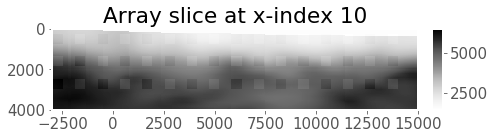

In [48]:
# code 
figure(7,7)
tvp = A3d(vp + vp * ch, extent=vp.extent)
_ = tvp.plot(10, unit='n', axis='x', aspect='equal', )

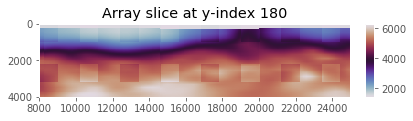

In [12]:
chq01.syn.i.tvp.plot(overwrite=0, overwrite_mmp=0, aspect='equal')

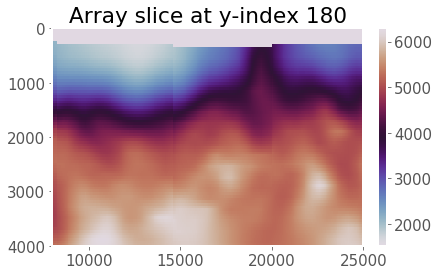

In [15]:
chq01.syn.i.tvp.bckg.plot()

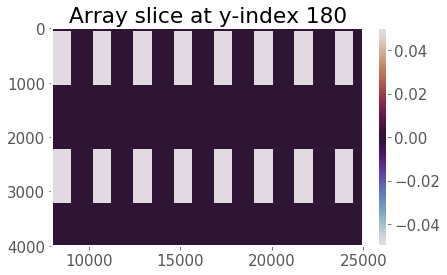

In [16]:
chq01.syn.i.tvp.anom.plot()

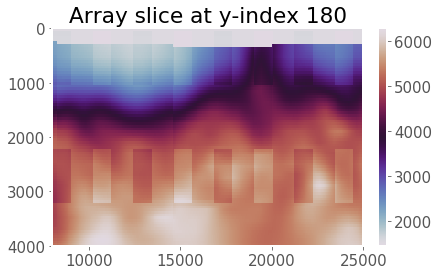

In [19]:
chq01.syn.i.tvp.plot(overwrite_mmp=1)

In [138]:
a.grid[0][-1]

array([[100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       ...,
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.],
       [100., 100., 100., ..., 100., 100., 100.]])

#### Fig.
Wavefield snapshots.

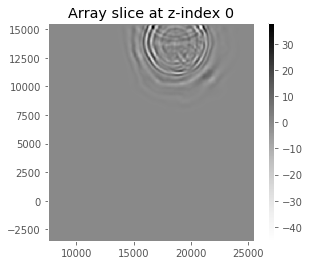

In [28]:
a = A3d(chq01.syn.o.fw.it[1][4104][1000].read(overwrite=0, overwrite_mmp=0))
a.plot(0, axis='z', aspect='equal')

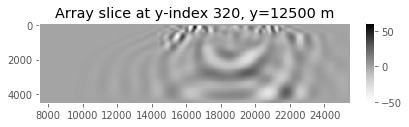

In [30]:
a = A3d(chq01.syn.o.fw.it[1][4104][1000].read(overwrite=0, overwrite_mmp=0))
a.plot(12500, unit='m', axis='y', aspect='equal')

#### Alg.
`chq01` -- inverting the synthetic 'field' data.

In [38]:
chq01.inv.i.ls()

Content of /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc/chq01inv/inp

total 680M
-rwx------ 1 kmc3817 root    0 Jun 18 00:31 fullwave3d-verbose-slave-4
-rwx------ 1 kmc3817 root    0 Jun 18 00:31 fullwave3d-verbose-slave-3
-rwx------ 1 kmc3817 root    0 Jun 18 00:31 fullwave3d-verbose-slave-2
-rwx------ 1 kmc3817 root    0 Jun 18 00:31 fullwave3d-verbose-slave-1
-rwx------ 1 kmc3817 root    0 Jun 18 00:31 fullwave3d-verbose-scheduler
-rwx------ 1 kmc3817 root 1.9K Jun 18 00:30 chq01inv-Run1.pbs
-rwx------ 1 kmc3817 root  39M Jun 18 00:28 chq01inv-StartVp.mmp
-rwx------ 1 kmc3817 root  39M Jun 18 00:28 chq01inv-StartVp.vtr
-rwx------ 1 kmc3817 root 7.0M Jun 18 00:26 chq01inv-Observed_windowed.mmp
-rwx------ 1 kmc3817 root 7.0M Jun 18 00:25 chq01inv-Observed_windowed.vtr
-rwx------ 1 kmc3817 root 7.2M Jun 18 00:25 chq01inv-Observed_windowed.sgy
-rwx------ 1 kmc3817 root 1.9K Jun 18 00:24 chq01inv-Run0.pbs
-rwx------ 1 kmc3817 root 120M Jun 18 00:24 chq01inv-Observed.mmp
-rwx------

Step 004: Preparing input for inversion.
Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//chq01inv//inp/chq01inv-RawSeis.txt : 
chq01inv-Observed_raw.sgy
 
Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//chq01inv//inp/chq01inv-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N chq01inv
#PBS -o ../out/chq01inv-JobOut0.log
#PBS -e ../out/chq01inv-JobErr0.log
#PBS -l walltime=00:01:00
#PBS -l select=1:mpiprocs=2:ompthreads=4:ncpus=8:mem=96gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/chq01inv-Runfile.key   
    rm $work_dir/chq01inv-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_W

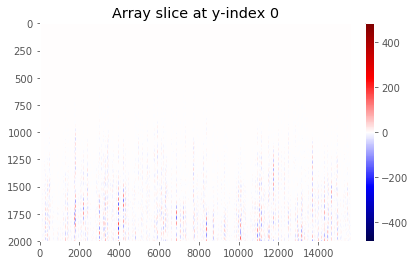

In [8]:
%%time
chq01.run([4], blocks=[{'nits': 20, 'minoff': 0, 'freq': 3.0},
                       {'nits': 20, 'minoff': 0, 'freq': 3.5},
                       {'nits': 20, 'minoff': 0, 'freq': 4.0},
                       {'nits': 20, 'minoff': 0, 'freq': 4.5},
                       {'nits': 20, 'minoff': 0, 'freq': 5.0},
                       {'nits': 20, 'minoff': 0, 'freq': 5.5},
                       {'nits': 20, 'minoff': 0, 'freq': 6.0},
                       {'nits': 20, 'minoff': 0, 'freq': 6.5}],
         kw_filt=None, twin=None, b_abs=5, e_abs=10) # fixme

In [9]:
chq01.inv.i.rnf.cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//chq01inv//inp/chq01inv-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     ibfs          : 0
     multisurf     : 0
     nosprdfctrs   : 0     
     seaLevel      : 0
     maxGhostIter  : 2
     vacuum        : 0
     accuracy      : 0.001
     minGhostFS    : 0.001
     

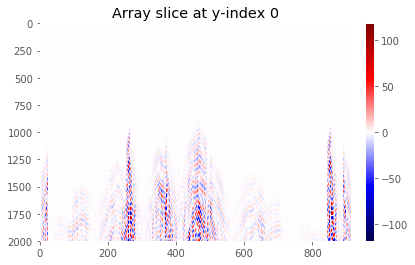

In [12]:
chq01.syn.o.syn.plot(win=dict(tracf=[4104]))

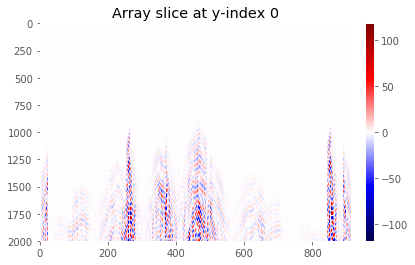

In [11]:
chq01.inv.i.obs.plot(win=dict(tracf=[4104]))

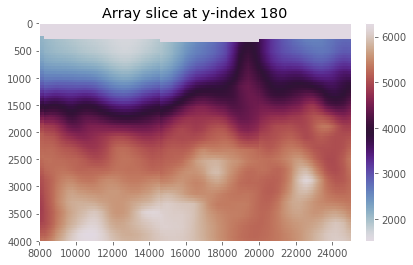

In [14]:
chq01.inv.i.svp.plot()

In [30]:
lll(20)
chq01.inv.i.pbs.no[1].prep(select=4, hours=12, cat=1)

INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No. of shots in the runfile (ncomp): 16
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs not specified. It will be chosen to maximize a decimal part of nshots / (mpiprocs-1) for a given select=
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: Max. decimal place 0.8421052631578947 is for mpiprocs: 5 and ompthreads: 8


Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_unc//chq01inv//inp/chq01inv-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N chq01inv
#PBS -o ../out/chq01inv-JobOut1.log
#PBS -e ../out/chq01inv-JobErr1.log
#PBS -l walltime=12:00:00
#PBS -l select=4:mpiprocs=5:ompthreads=8:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/chq01inv-Runfile.key   
    rm $work_dir/chq01inv-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCE

#### Fig.
Data fit functional.

(0, 40)

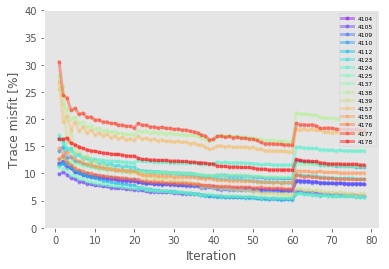

In [10]:
chq01.inv.o.fit.plot(run_ids=[1])
plt.ylim(0,40)

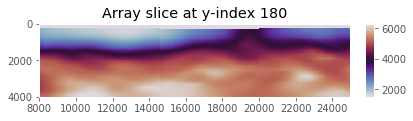

In [25]:
chq01.inv.o.vp.it[0].plot(overwrite=1, overwrite_mmp=1, aspect='equal')

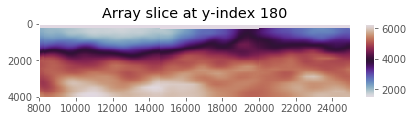

In [24]:
chq01.inv.o.vp.it[60].plot(overwrite=1, overwrite_mmp=1, aspect='equal')

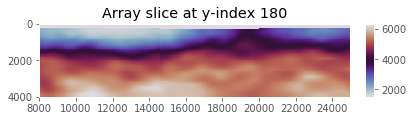

In [12]:
chq01.inv.o.vp.it[77].plot(overwrite=1, overwrite_mmp=1, aspect='equal')

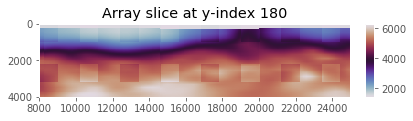

In [23]:
chq01.syn.i.tvp.plot(overwrite=1, overwrite_mmp=1, aspect='equal')

# ...